In [5]:
from pylab import *
%matplotlib inline

In [94]:
def rk4(ec,p_ini,x,args=0, h = 0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    
    if args == 0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+h*0.5)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+h*0.5)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+h*0.5,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+h*0.5,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [115]:
def e_mov(r_v,t,fric=0,g=9.80665,m=1):
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx=r_v[2]
    dy=r_v[3]
    if fric == 0:
        dvx,dvy=0,-(g/m)
        #print "No use un modelo de friccion"
    else:
        dvx= -(fric([r_v[2],r_v[3]])[0])
        dvy= -(g/m) -(fric([r_v[2],r_v[3]])[1])
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

In [116]:
def fric_id(v):
    return([0,0])

def fric_v(v,gamma=0.1):
    f_x =gamma*v[0]
    f_y =gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2+v[1]**2)
    f_x =gamma*norm_v*v[0]
    f_y =gamma*norm_v*v[1]
    return array([f_x,f_y])

In [117]:
print e_mov([1,1,1,1],10)
print e_mov([1,1,1,1],1,fric_id)
print e_mov([1,1,1,1],1,fric_v)
print e_mov([1,1,1,1],1,fric_v2)

[ 1.       1.       0.      -9.80665]
[ 1.       1.       0.      -9.80665]
[ 1.       1.      -0.1     -9.90665]
[ 1.          1.         -0.14142136 -9.94807136]


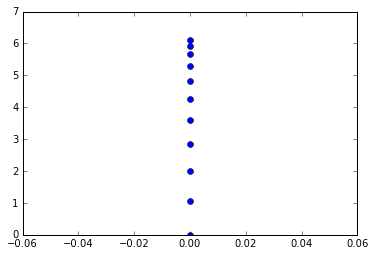

In [145]:
#rk4(ec,p_ini,x,args=0, h = 0.1):
p = [0,0,0,11]
t,sol_id = rk4(e_mov,p,[0,1],0,0.1)
t,sol_fv = rk4(e_mov,p,[0,1],fric_v,0.1)
t,sol_fv2 = rk4(e_mov,p,[0,1],fric_v2,0.1)
plot(sol_id[:,0],sol_id[:,1],'o')
#plot(sol_fv[:,0],sol_fv[:,1],'o')
#plot(sol_fv2[:,0],sol_fv2[:,1],'o')

In [36]:
def test(p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    return sol[:,0]

In [37]:
print test([1,2],[1,8],1)

[ 0.  0.  0.  0.  0.  0.  0.  0.]
